In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
#from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)



Tensorflow version: 2.9.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_size=48 

batch_size=64 

datagen_train=ImageDataGenerator(horizontal_flip=True) 

train_generator=datagen_train.flow_from_directory("/content/drive/MyDrive/jaffe/train",target_size=(img_size,img_size),color_mode='grayscale',batch_size=batch_size,class_mode='categorical',shuffle=True) 

datagen_validate=ImageDataGenerator(horizontal_flip=True) 

test_generator=datagen_validate.flow_from_directory("/content/drive/MyDrive/jaffe/test",target_size=(img_size,img_size),color_mode='grayscale',batch_size=batch_size,class_mode='categorical',shuffle=True) 

Found 209 images belonging to 7 classes.
Found 91 images belonging to 7 classes.


In [ ]:
model=Sequential() 
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1))) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25)) 

model.add(Conv2D(128,(5,5),padding='same')) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25)) 

model.add(Conv2D(512,(3,3),padding='same')) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25)) 

model.add(Conv2D(512,(3,3),padding='same')) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25)) 

model.add(Flatten()) 

model.add(Dense(256)) 

model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(Dropout(0.25)) 
model.add(Dense(512)) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(Dropout(0.25)) 

model.add(Dense(7,activation='softmax')) 
opt=Adam(lr=0.05) 
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy']) 
model.summary() 




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)      

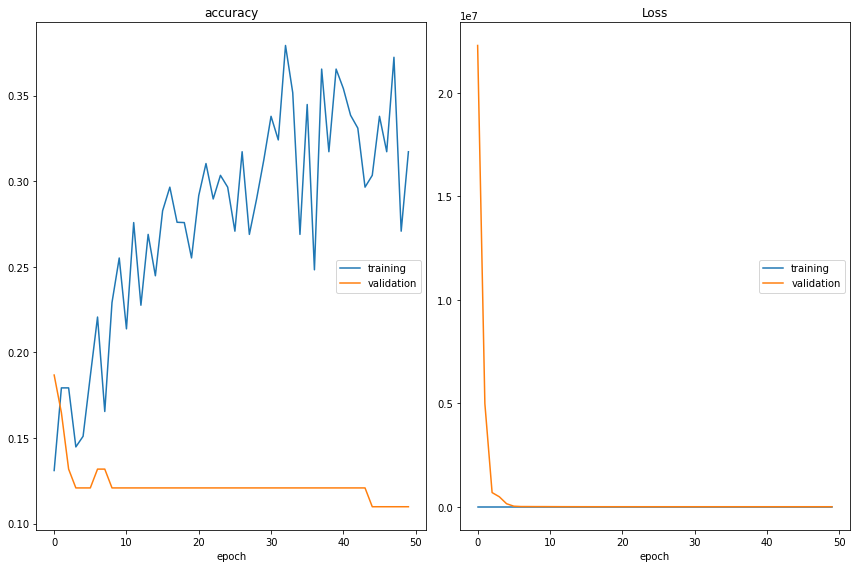

accuracy
	training         	 (min:    0.131, max:    0.379, cur:    0.317)
	validation       	 (min:    0.110, max:    0.187, cur:    0.110)
Loss
	training         	 (min:    1.621, max:    6.227, cur:    1.679)
	validation       	 (min:   19.006, max: 22291666.000, cur:   19.006)

Epoch 50: saving model to model_weights.h5
3/3 [==============================] - 8s 3s/step - loss: 1.6792 - accuracy: 0.3172 - val_loss: 19.0059 - val_accuracy: 0.1099 - lr: 0.0050


In [ ]:
!pip install livelossplot
from livelossplot import PlotLossesKerasTF
epochs=50
steps_per_epoch=train_generator.n//train_generator.batch_size 

validation_steps=test_generator.n//test_generator.batch_size
checkpoint=ModelCheckpoint("model_weights.h5",monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')
callbacks=[PlotLossesKerasTF(),checkpoint,reduce_lr]
history=model.fit(
x=train_generator,
steps_per_epoch=steps_per_epoch,
epochs=epochs,
validation_data=test_generator,
callbacks=callbacks
)


In [ ]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)